In [89]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [90]:
df = pd.read_excel('/home/robbie/Dropbox/book_chapter/data/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx',
                    sheet_name='Laptev-Area-km^2')

df.drop(index=59,inplace=True)


df.drop(columns=['month',   'day'],
        inplace=True)

# df[df.isnull()] = np.nan

df.columns

Index([1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='object')

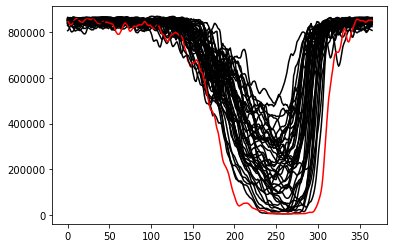

In [91]:
for col in df.columns:
    
    if int(col) == 2020:
        color='r'
    else:
        color='k'
    
    plt.plot(df[col],color=color)

In [92]:
list(df.columns)

[1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

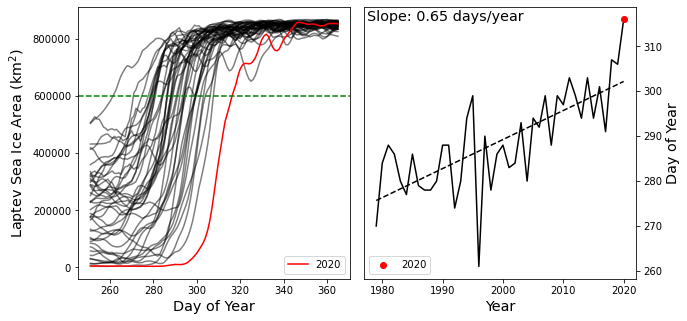

In [93]:
df['doy'] = np.arange(1,df.shape[0]+1)
df.set_index('doy',inplace=True)
df_late = df.iloc[250:]


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

doy_freezeup = []

for col in df.columns:
    
    if int(col) == 2020:
        color='r'; alpha=1
    else:
        color='k'; alpha=0.5
        
    doy_freezeup.append( np.argmax( np.array(df_late[col]) > 600_000) + 250)
    
    ax1.plot(df_late[col],color=color,alpha=alpha)

ax1.axhline(600_000,color='g',ls='--')    

ax2.plot(df.columns[1:-1], doy_freezeup[1:-1],color='k')
ax2.scatter(2020,doy_freezeup[-2],marker='o',color='r',zorder=5,label='2020')

ax1.set_ylabel('Laptev Sea Ice Area (km$^2$)',fontsize='x-large')
ax1.set_xlabel('Day of Year',fontsize='x-large')

ax1.plot([],[],color='r',label='2020')


ax2.set_ylabel('Day of Year',fontsize='x-large')
ax2.set_xlabel('Year',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax1.legend(loc='lower right')
ax2.legend(loc='lower left')

stats = linregress(list(df.columns[1:-1]), doy_freezeup[1:-1])

ax2.plot([1979,2020],[1979*stats[0] + stats[1],
                      2020*stats[0] + stats[1]],
         ls='--',color='k')

round_slope = np.round(stats[0],decimals=2)

ax2.annotate(xy=(0.01,0.95),text=f'Slope: {round_slope} days/year',
             fontsize='x-large', xycoords='axes fraction')

plt.subplots_adjust(wspace=0.05)

(120.0, 200.0)

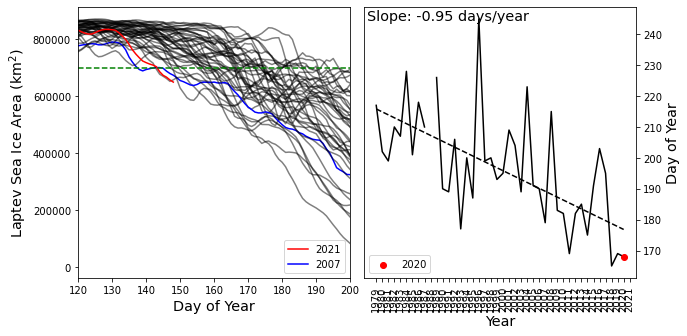

In [105]:
df['doy'] = np.arange(1,df.shape[0]+1)
df.set_index('doy',inplace=True)
df_late = df.iloc[:]


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

doy_meltonset = []

for col in df.columns:
    
    if int(col) == 2021:
        color='r'; alpha=1
    elif int(col) == 2007:
        color='b'; alpha=1
    else:
        color='k'; alpha=0.5
    
    if int(col) != 1988:
        doy_meltonset.append( np.argmin( np.array(df_late[col]) > 500_000))
    else:
        doy_meltonset.append(np.nan)
    
    ax1.plot(df_late[col],color=color,alpha=alpha)

ax1.axhline(700_000,color='g',ls='--')    

ax2.plot(df.columns[1:-1], doy_meltonset[1:-1],color='k')
ax2.scatter(2020,doy_meltonset[-2],marker='o',color='r',zorder=5,label='2020')

ax1.set_ylabel('Laptev Sea Ice Area (km$^2$)',fontsize='x-large')
ax1.set_xlabel('Day of Year',fontsize='x-large')

ax1.plot([],[],color='r',label='2021')
ax1.plot([],[],color='b',label='2007')


ax2.set_ylabel('Day of Year',fontsize='x-large')
ax2.set_xlabel('Year',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax1.legend(loc='lower right')
ax2.legend(loc='lower left')

chopped_years = np.array(df.columns[1:]).astype(np.int)
chopped_doys = np.array(doy_meltonset[1:])

stats = linregress(chopped_years[~np.isnan(chopped_doys)],
                    chopped_doys[~np.isnan(chopped_doys)])

ax2.plot([1979,2020],[1979*stats[0] + stats[1],
                      2020*stats[0] + stats[1]],
         ls='--',color='k')

round_slope = np.round(stats[0],decimals=2)

ax2.annotate(xy=(0.01,0.95),text=f'Slope: {round_slope} days/year',
             fontsize='x-large', xycoords='axes fraction')

ax2.set_xticks(chopped_years)
ax2.set_xticklabels(chopped_years,rotation=90)

plt.subplots_adjust(wspace=0.05)

ax1.set_xlim(120,200)

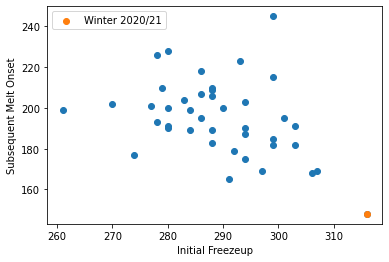

In [104]:
plt.scatter(doy_freezeup[1:-1],doy_meltonset[2:])

plt.scatter(doy_freezeup[-2],doy_meltonset[-1],label='Winter 2020/21')

plt.ylabel('Subsequent Melt Onset')
plt.xlabel('Initial Freezeup')

plt.legend()

Text(0.5, 0, 'Laptev Melt Onset DOY')

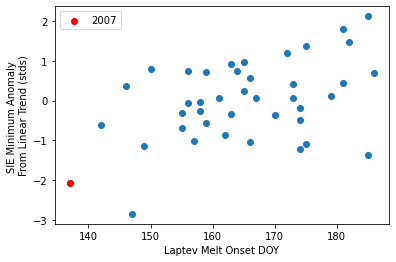

In [96]:
plt.scatter(chopped_doys[:-1],anomalies)
plt.scatter(chopped_doys[-15],anomalies[-14],label='2007',color='r')
plt.legend()
plt.ylabel('SIE Minimum Anomaly \nFrom Linear Trend (stds)')
plt.xlabel('Laptev Melt Onset DOY')

In [75]:
mo_anom_stats = linregress(chopped_doys[:-1][~np.isnan(chopped_doys[:-1])],anomalies[~np.isnan(chopped_doys[:-1])])

In [54]:
df = pd.read_excel('/home/robbie/Dropbox/book_chapter/data/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx',)

# df.drop(index=59,inplace=True)
df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

df[df.isnull()] = np.nan

df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,NaN,...,13.353,12.959,13.011,13.073,12.721,12.643,12.484,12.934,13.046,12.702
1,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,14.305,...,13.421,12.961,13.103,13.125,12.806,12.644,12.600,12.992,13.072,12.671
2,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,NaN,...,13.379,13.012,13.116,13.112,12.790,12.713,12.634,12.980,13.170,12.704
3,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,14.417,...,13.414,13.045,13.219,13.051,12.829,12.954,12.724,13.045,13.193,12.770
4,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,NaN,...,13.417,13.065,13.148,13.115,12.874,12.956,12.834,13.147,13.166,12.814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,14.383,NaN,NaN,13.953,NaN,13.664,13.394,NaN,13.766,NaN,...,12.669,12.693,12.967,12.680,12.291,12.291,12.325,12.721,12.579,NaN
362,NaN,14.101,14.172,NaN,14.144,NaN,NaN,13.571,NaN,NaN,...,12.834,12.870,12.930,12.745,12.484,12.235,12.344,12.712,12.582,NaN
363,14.500,NaN,NaN,14.128,NaN,13.855,13.494,NaN,13.904,NaN,...,12.926,12.897,12.936,12.762,12.525,12.223,12.523,12.780,12.608,NaN
364,NaN,14.092,14.093,NaN,14.159,NaN,NaN,13.701,NaN,NaN,...,12.931,12.804,13.038,12.800,12.617,12.273,12.569,12.858,12.622,NaN


In [55]:
timeseries = []

for col in df.columns[:]:
    
    timeseries += list(df[col])
    
timeseries = np.array(timeseries)

timeseries[np.isnan(timeseries)] = np.nan

In [56]:
x = np.arange(len(timeseries))[~np.isnan(timeseries)]

y = timeseries[~np.isnan(timeseries)]

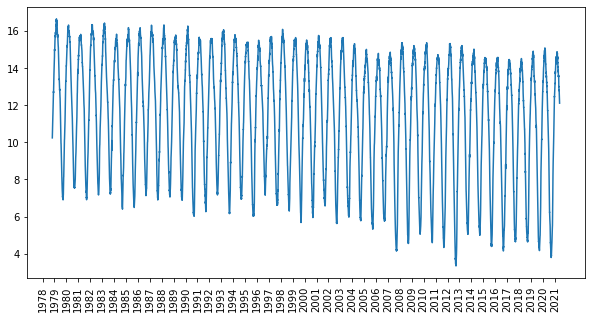

In [57]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x,y)

ax.set_xticks(np.arange(0,366*44,366))
ax.set_xticklabels(np.arange(1978,2022),rotation=90)

# plt.plot(np.arange(300,350),timeseries[300:350],color='k')

plt.show()

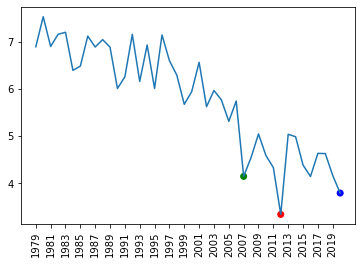

In [58]:
doy_mins = []
years = []
specials = []

for col in df.columns:
    
    doy_min = np.min(df[col])
    doy_mins.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2007,2012,2020]):
        specials.append(doy_min)
    
years = years[1:-1]
doy_mins = doy_mins[1:-1]
    
plt.plot(years,doy_mins)
plt.scatter([2007,2012,2020],specials,c=['g','r','b'])
plt.xticks(years[::2],rotation=90)
plt.show()

(3.1, 11.0)

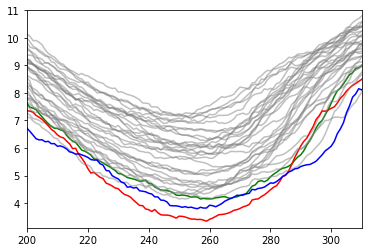

In [59]:
for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    plt.plot(df.index,df[col],color=color,alpha=alpha)

plt.xlim(200,310)
plt.ylim(3.1,11)

# Summary plot

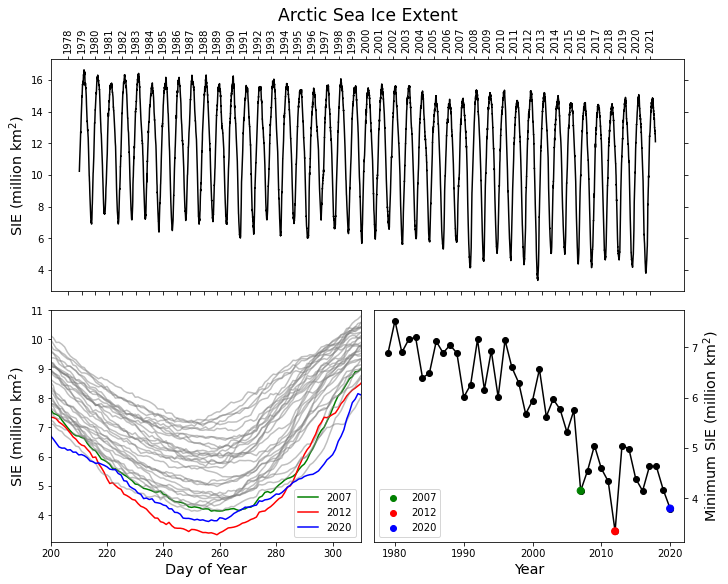

In [60]:
fig = plt.figure(constrained_layout=True,figsize=(10,8))

gs = fig.add_gridspec(2, 2)

top_ax = fig.add_subplot(gs[0, :])
top_ax.set_title('Arctic Sea Ice Extent', fontsize='xx-large')

top_ax.plot(x,y,color='k')

top_ax.set_xticks(np.arange(0,366*44,366))
top_ax.set_xticklabels(np.arange(1978,2022),rotation=90)

top_ax.xaxis.set_label_position('top') 
top_ax.xaxis.tick_top()
top_ax.yaxis.set_ticks_position('both')
top_ax.xaxis.set_ticks_position('both')


top_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')


#####################################


BL_ax = fig.add_subplot(gs[1, :-1])

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index,df[col],color=color,alpha=alpha)

BL_ax.set_xlim(200,310)
BL_ax.set_ylim(3.1,11)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='lower right')

#####################################

BR_ax = fig.add_subplot(gs[1:, -1])

BR_ax.plot(years,doy_mins,color='k',marker='o')

BR_ax.scatter([2007,2012,2020],specials,c=['g','r','b'],zorder=5,s=50)

BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='lower left')



In [63]:
import pickle
anomalies = pickle.load(open('anomalies.p', 'rb'))